Description
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed. We obtained the data from https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones . 

**Description of Data:**

The experiments was carried out with a group of 30 volunteers and each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz was recorded. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

**Table of Content**

1. Importing necessary libraries and Loading data
3. Data preprocessing

   3.a Checking for duplicates
   
   3.b Checking for missing values
   
   3.c Checking for class imbalance
   
4. Exploratory Data Analysis

   4.a Analysing tBodyAccMag-mean feature
   
   4.b Analysing Angle between X-axis and gravityMean feature
   
   4.c Analysing Angle between Y-axis and gravityMean feature
   
   4.d Visualizing data using t-SNE
   
5. Model Prediction and Evaluation

   5.a Logistic regression model with Hyperparameter tuning and cross validation
   
   5.b Linear SVM model with Hyperparameter tuning and cross validation
   
   5.c Kernel SVM model with Hyperparameter tuning and cross validation
   
   5.d Decision tree model with Hyperparameter tuning and cross validation
   
   5.e Random forest model with Hyperparameter tuning and cross validation
   
6. Conclusion

# 1. Importing Libraries and Loading Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter 

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING


In [5]:
print(train.shape, test.shape)

(7352, 563) (999, 563)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
train['subject'].value_counts() # what subjects are included and how many data points we have associated to each

subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64

# Data Preprocessing

In [8]:
print(sum(train.duplicated()), sum(test.duplicated()) ) #checking for duplicated values in train and test

0 0


In [9]:
print(train.isnull().values.sum(), test.isnull().values.sum()) #checking for null values

0 0


# Exploratory Data Analysis to see what features are important to analyze

In [10]:
train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING


In [11]:
#checking counts in 'Activity' class

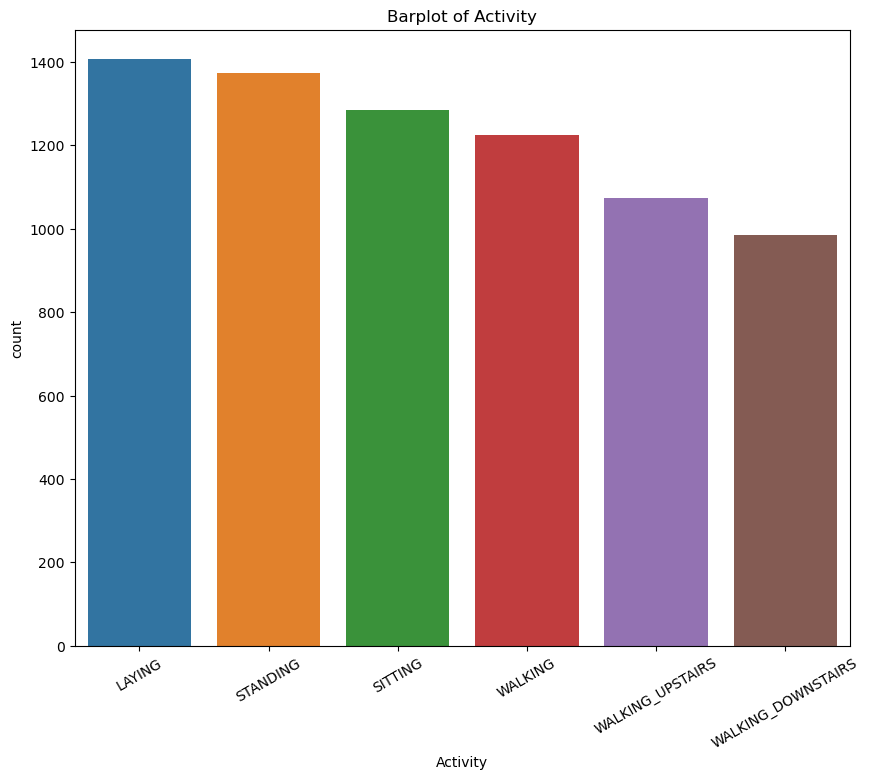

In [12]:
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(x = 'Activity', data = train, order = train['Activity'].value_counts().index) # plotting in sorted order, counts  of each activity
plt.xticks(rotation = 30)
plt.show()

It appears that roughly each activity is well-represented in data

Let us count the instances of 'BodyAcceleration', 'BodyGyro', and all othe variables, regardless of the x, y, z directions to get an idea. 

Note that from the first 10 columns, we need to take the string before '-' to do so.
For the rest of the columns, we need to take the string before '(' character. 

In [13]:
train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING


In [14]:
# following code extracts the column names as discussed above
new_col = []

for col in train.columns:
    
    new_col.append(col.split('-')[0].split('(')[0])

    count_dict = Counter(new_col) # how many times each column has appeared

cat_count_without_directions = pd.DataFrame.from_dict(count_dict, orient = 'index').rename(columns = {0 : 'Count'})

In [15]:
cat_count_without_directions.sort_values(by = 'Count', ascending = False)

,Count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


# Analysing tBodyAccMag-mean

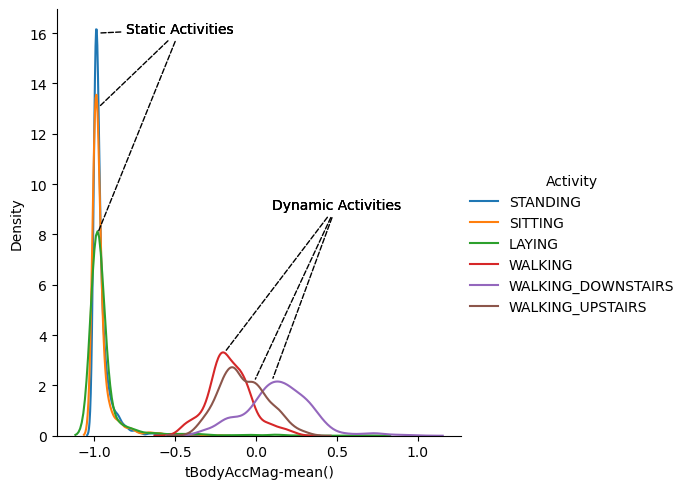

In [16]:
lattice = sns.FacetGrid(data = train, hue = 'Activity', height = 5)
lattice.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate("Static Activities", xy = (-.98, 8), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 13), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 16), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})


plt.show()

Above density plot gives us an easy criteria seperate static activities from dynamic activities, so far.

if(tBodyAccMag-mean()< -0.5):

    Activity = "static"
    
else:

    Activity = "dynamic"
    
WE STILL WANT TO TAKE A CLOSER LOOK AT SOME REFINED PLOTS

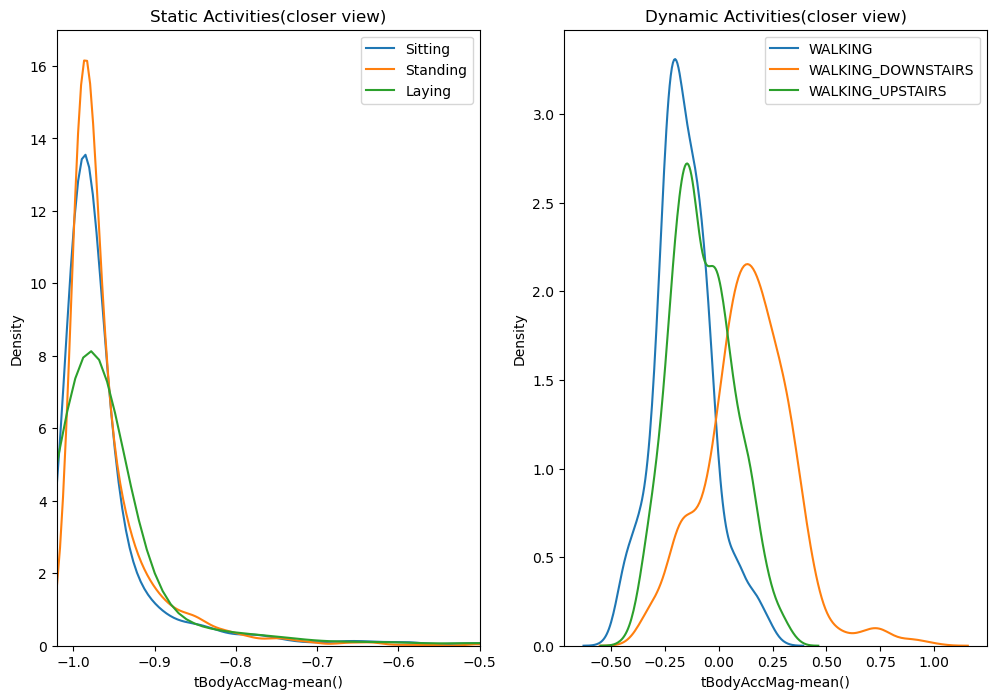

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)

plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.legend()
plt.axis([-1.02, -0.5, 0, 17])

plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'], hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.legend()
plt.show()

Amongst other plots, boxplots will be very helpful in this type of data

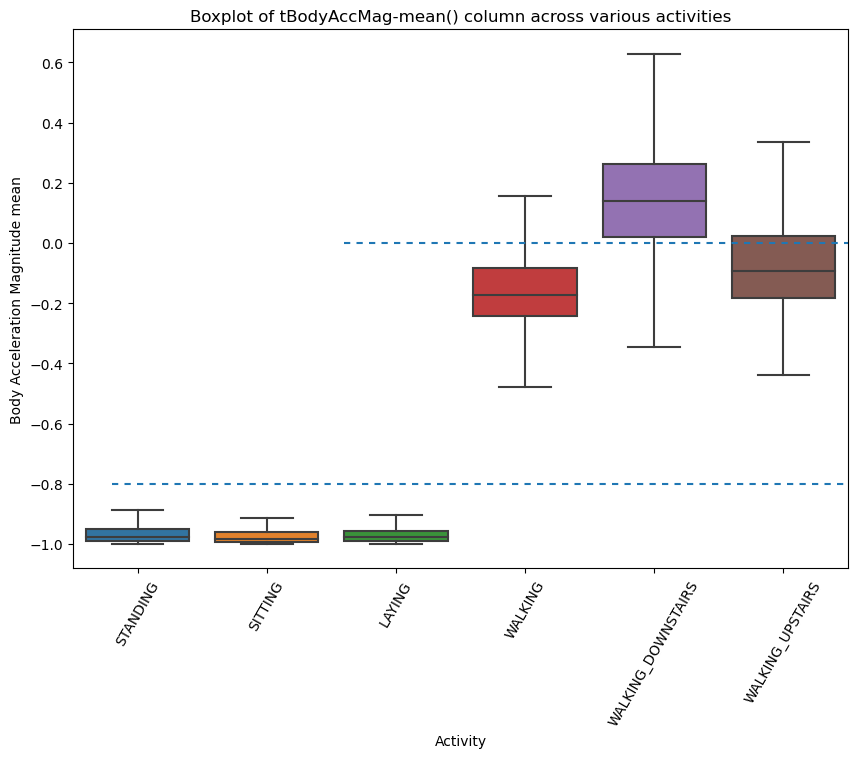

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = train, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.xticks(rotation = 60)
plt.show()

We have discovered a 'wide gap' between STATIC and DYNAMIC ACTIVITIES ( a gap of at least 0.2):

if(tBodyAccMag-mean()<=-0.8):

    Activity = "static"
    
if(tBodyAccMag-mean()>=-0.6):

    Activity = "dynamic"

# Visualizing angle(X, gravityMean)

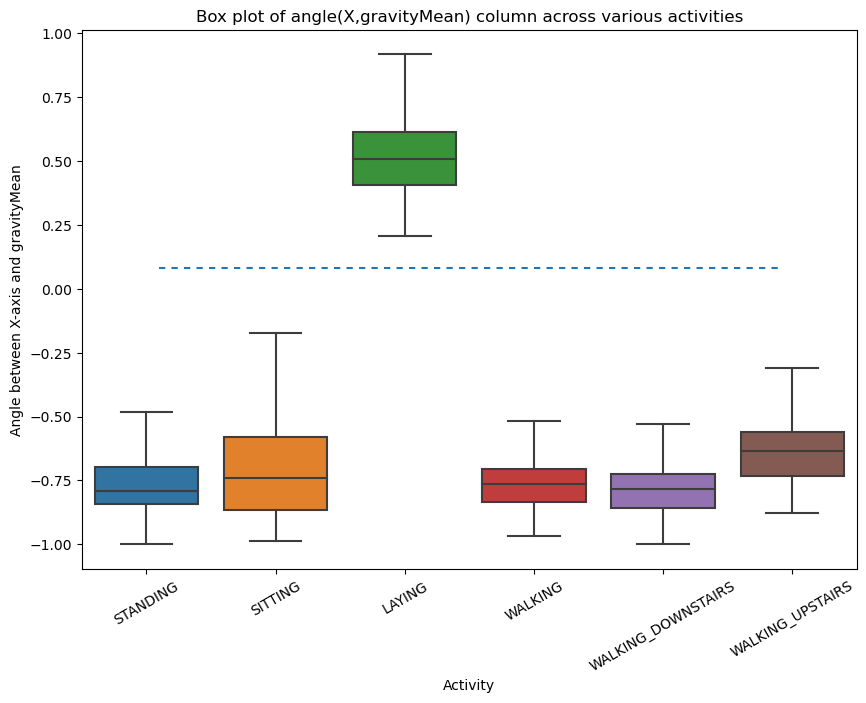

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

Above boxplot clearly separates LAYING from all other activities

In [21]:
train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING


# Visualizing angle(y, gravityMean)

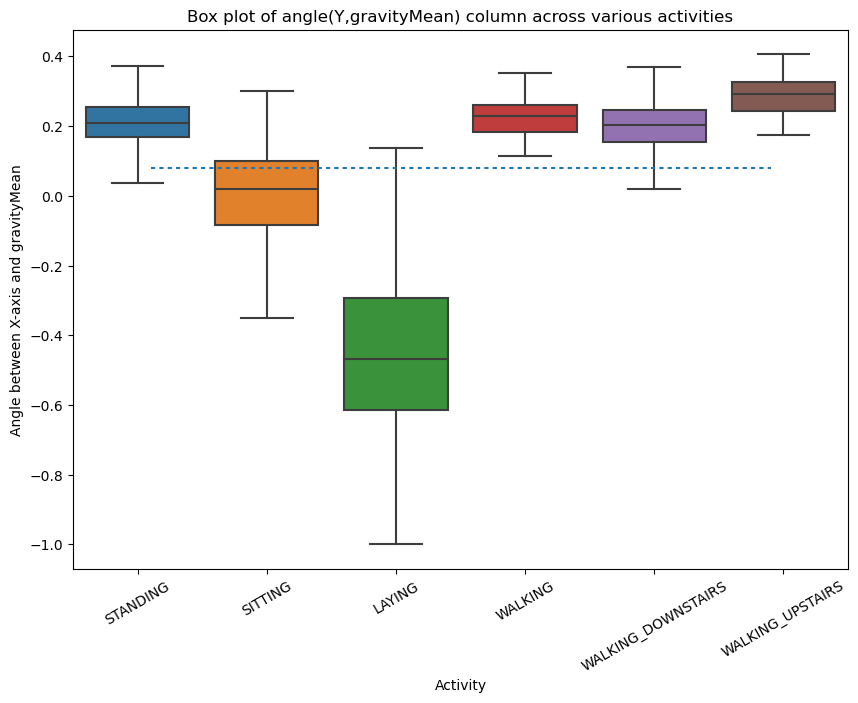

In [22]:
plt.figure(figsize=(10,7))

sns.boxplot(x = 'Activity', y = 'angle(Y,gravityMean)', data = train, showfliers = False)
plt.axhline(y = 0.08, xmin = 0.1, xmax = 0.9, dashes = (2, 2))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

# Sometimes visualizing data after dimension reductions can give us a hint into the distribution

In [23]:
# we do not need subject and dependent variable 'Activity' for PCA so we drop them and then perform PCA on it, with 2 components
# for plotting in the plane

In [24]:
data_PCA = train.drop(['subject', 'Activity'], axis = 1)

In [25]:
pca = PCA(n_components = 2)
pca.fit(data_PCA)
data_after_PCA = pca.transform(data_PCA)

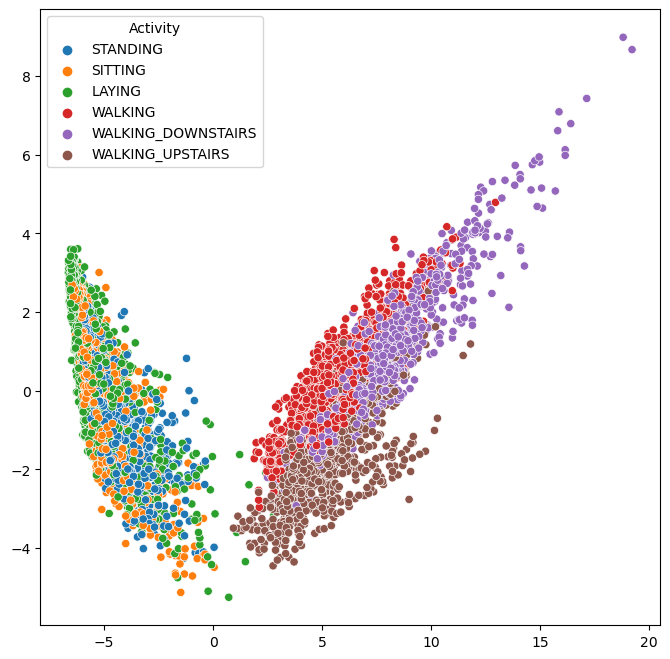

In [26]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = data_after_PCA[:,0], y = data_after_PCA[:,1], hue = train['Activity'])
plt.show()

PCA turned out to be somewhat effective in this case to separately visualize all six activities, in mere 2D space. However, not all six activities are separated properly, especially amongst STATIC and DYNAMIC ones. 

We will try a non-linear dimensionality reduction t-SNE (t-distributed Stochastic Neighbor Embedding) because it can do reduction non-linearly. Important because not all data is linearly separable. 

Also, PCA preserves the variance in the data, whereas t-SNE preserves the relationships between data points in a lower-dimensional space, making it quite a good algorithm for visualizing complex high-dimensional data. 

In [27]:
data_for_TSNE = data_PCA
tsne = TSNE(n_components = 2, n_iter = 500)
data_after_TSNE = tsne.fit_transform(data_for_TSNE)

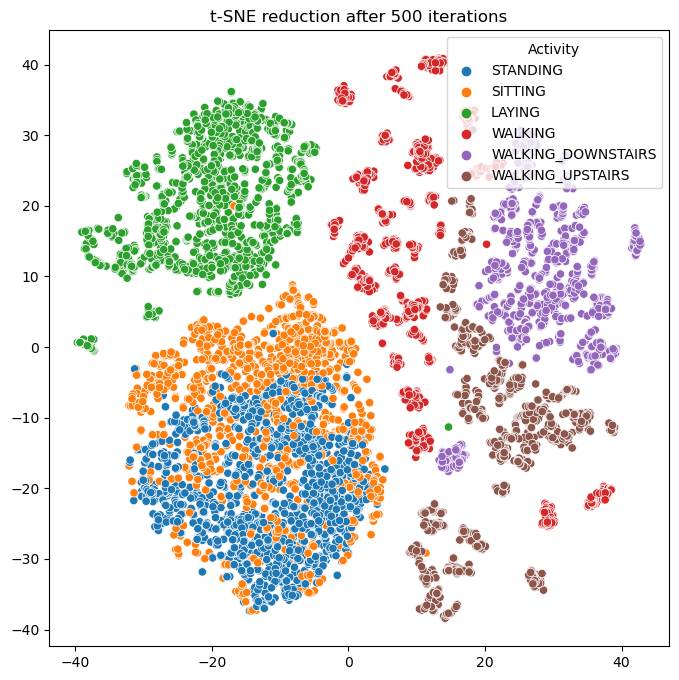

In [28]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = data_after_TSNE[:,0], y = data_after_TSNE[:,1], hue = train['Activity'])
plt.title('t-SNE reduction after 500 iterations')
plt.show()

In [33]:
tsne2 = TSNE(n_components = 2, n_iter = 1000)
data_after_second_TSNE = tsne2.fit_transform(data_for_TSNE)

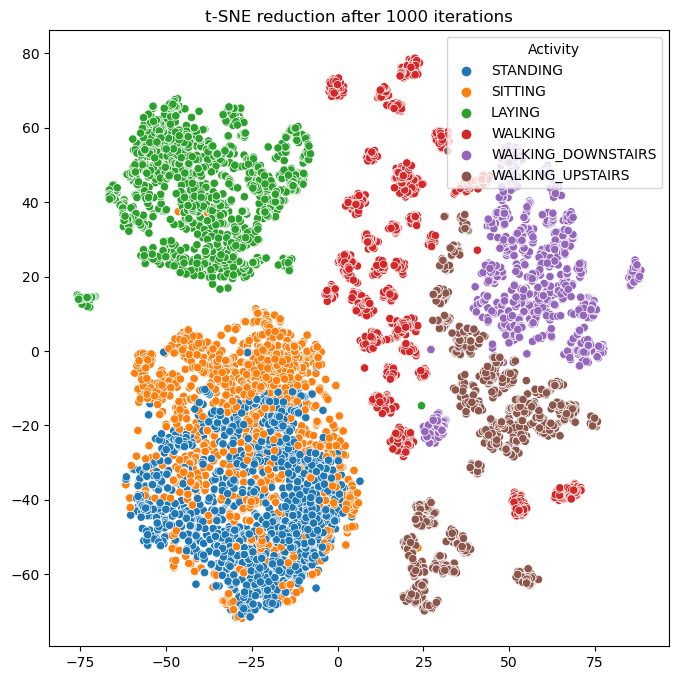

In [34]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = data_after_second_TSNE[:,0], y = data_after_second_TSNE[:,1], hue = train['Activity'])
plt.title('t-SNE reduction after 1000 iterations')
plt.show()

As evident above, t-SNE does a remarkable job in separating activities, except for SITTING AND STANDING

# Machine Learning Models

In [36]:
x_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train.Activity

x_test = test.drop(['subject', 'Activity'], axis = 1)
y_test = test.Activity

In [37]:
print(x_train.shape, x_test.shape)

(7352, 561) (999, 561)


# Logistic Regression with Tuning and Cross-validation

In [38]:
parameters = {'max_iter': [100, 200, 500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, cv = 5 ) #using the default 5-fold cross validation
lr_classifier_rs.fit(x_train, y_train)
y_pred = lr_classifier_rs.predict(x_test)

In [39]:
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Logistic Regression : ", lr_accuracy) 

Accuracy using Logistic Regression :  0.954954954954955


In [40]:
# the accuracy of the LR with RandomizedSearch is 95.5% and we the corrresponding confusion_matrix is:

confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[183,   0,   0,   0,   0,   0],
       [  0, 146,  21,   0,   0,   3],
       [  0,   8, 170,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

In [42]:
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [43]:
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(max_iter=200)
Best set of parameters :  {'max_iter': 200}
Best score :  0.9371673672868195


# we want to compare other ML models and their performance, first DecisionTreeClassifier

In [44]:
parameters = {'max_depth': np.arange(2, 10, 2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters)
dt_classifier_rs.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])})

In [45]:
y_pred = dt_classifier_rs.predict(x_test)

In [46]:
accuracy_score = accuracy_score(y_test, y_pred)

In [47]:
accuracy_score

0.8508508508508509

In [48]:
# only 85% accurate. Let us see the confusion_matrix

In [49]:
print(confusion_matrix(y_test, y_pred))

[[183   0   0   0   0   0]
 [  0 107  63   0   0   0]
 [  0  30 148   0   0   0]
 [  0   0   0 182   3   0]
 [  0   0   0   7 124   3]
 [  0   0   0  41   2 106]]


In [50]:
# The inaccuracy seems to have stemmed from a large number of mis-classifications in one class

# Although DT model is not very accurate, let us try RandomForest model to see if it improves the accuracy

In [103]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [104]:
y_pred = rf_classifier.predict(x_test)

In [106]:
rf_accuracy = sum(y_test == y_pred)/y_test.size
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.914914914914915


In [108]:
# we see that the accuracy of the Random Forest classifier is 91.5% which is greater than DT but not that larger

In [107]:
confusion_matrix(y_test.values, y_pred)

array([[183,   0,   0,   0,   0,   0],
       [  0, 138,  32,   0,   0,   0],
       [  0,  30, 148,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   5, 129,   0],
       [  0,   0,   0,  18,   0, 131]], dtype=int64)

# Kernel SVM model with Hyperparameter tuning and cross validation

In [82]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}

support_vector_machine = SVC()
support_vector_machine_rs = RandomizedSearchCV(support_vector_machine, param_distributions = parameters, cv = 3)
support_vector_machine_rs.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [83]:
y_pred = support_vector_machine_rs.predict(x_test)

In [92]:
confusion_matrix(y_test, y_pred)

array([[183,   0,   0,   0,   0,   0],
       [  0, 149,  19,   0,   0,   2],
       [  0,   7, 171,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,   6,   0, 143]], dtype=int64)

In [94]:
y_test.size

999

In [ ]:
# let us calculate accuracy score manually this time

In [98]:
sum(y_test == y_pred)/y_test.size

0.965965965965966

# Conclusions

1. Analysis of cellphone data obtained from Kaggle was performed and a ML model for prediction of 'Human Actvitity' was implemented using Logistic Regression and kernel SVM, both with tuning and cross-validation. 

2. The exploratory data-analysis (EDA) was an important step in this analaysis. This helped us understand the data well and gave us a good sense of the distribution of the data. 

3. It was suggestive after EDA that t-SNE would be a better feature extractor than PCA. Therefore, t-SNE was performed for feature extraction and visualization. 

4. Then the data was split into training and test data using 70-30 rule and then ML models were implemented one after another. 

5. Although we did implement DT and RandomForest classifiers, mostly as a part of comparative study, due to high-dimensionality in the data, these classifiers were not particularly efficient. 

6. The logistic regression classifier and RandomForest classifiers performed very well. Their respective efficiencies were 95.49% and 96.59%. 

**The conclusion is that both kernel SVM and logistic regression classifiers work well for the purpose of recognizing human activity and the percentage accuracy for both of them is quite impressive. On the other hand, tree-based classifiers consistently underperform for this data**